In [232]:
#Importing the libraries
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [233]:
#Reading the csv file
customer_df = pd.read_csv(r'C:\Users\Samu\Documents\Ironhack\lab-cleaning-categorical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [234]:
#Checking the dataframe features
print(customer_df.shape)
print(customer_df.info())

(9134, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 n

In [235]:
#Checking the dataframe head
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [236]:
#Checking the dataframe tail
customer_df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [237]:
#Standardizing the dataframe column names
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower())
customer_df.columns = cols
customer_df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [238]:
#Correcting the data type of the date column
customer_df['effective to date'] = pd.to_datetime(customer_df['effective to date'], errors='coerce')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

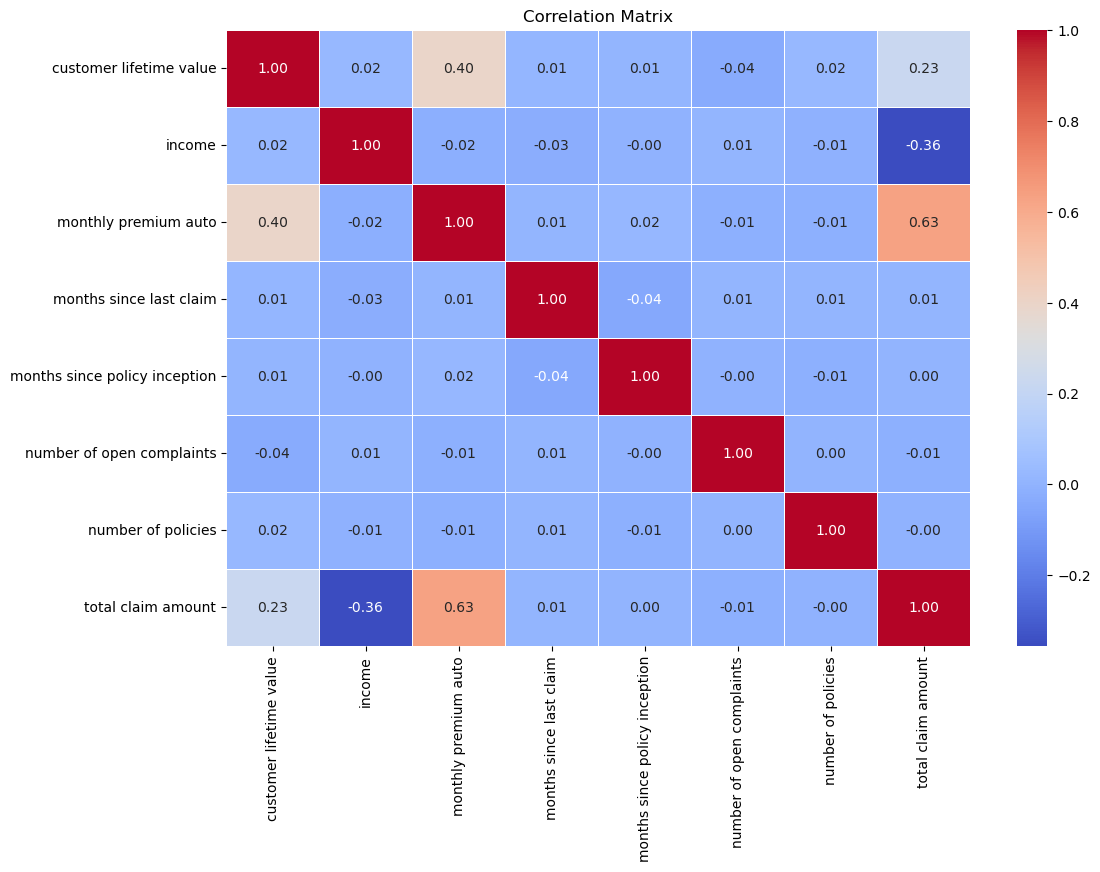

In [239]:
# Select only the numerical columns
numerical_df = customer_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

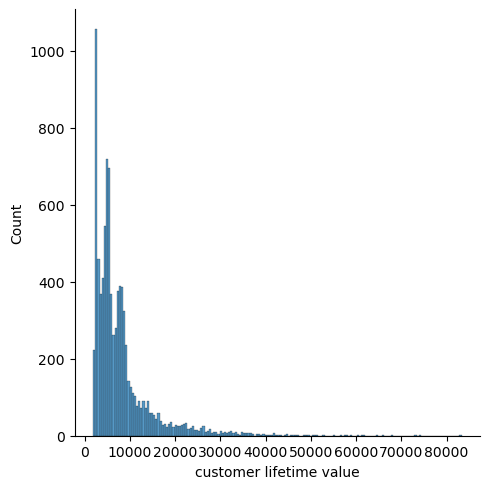

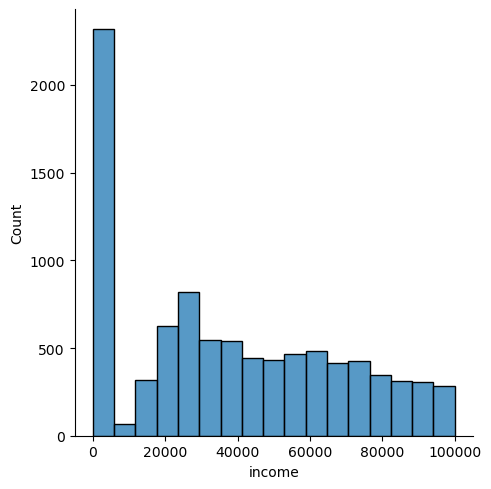

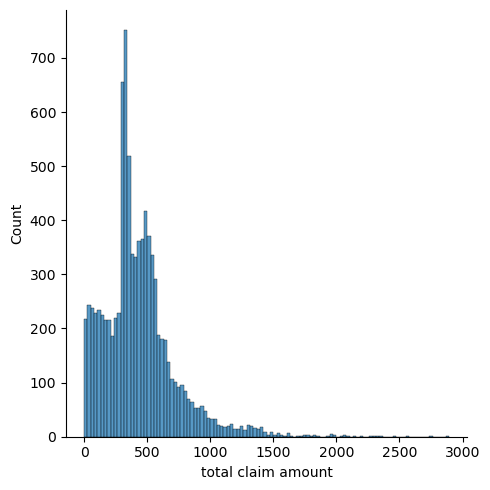

In [240]:
#Plotting the continous variables
continous = ['customer lifetime value', 'income', 'total claim amount']
for i in continous:
    sns.displot(customer_df[i])
    plt.show()

From the continous variables, we can see that for customer value, we have a spike in low values, with some outliers on high values.

Also, we can see in the income a high spike on 0, with a big drop on the next value, then equilibrating from then on.

We can see that the total claim amount has a big spike near 500 and then drops regularly, with some spread out outliers.

In [241]:
#Dropping the customer id column
customer_df.drop(['customer'], axis=1, inplace=True)

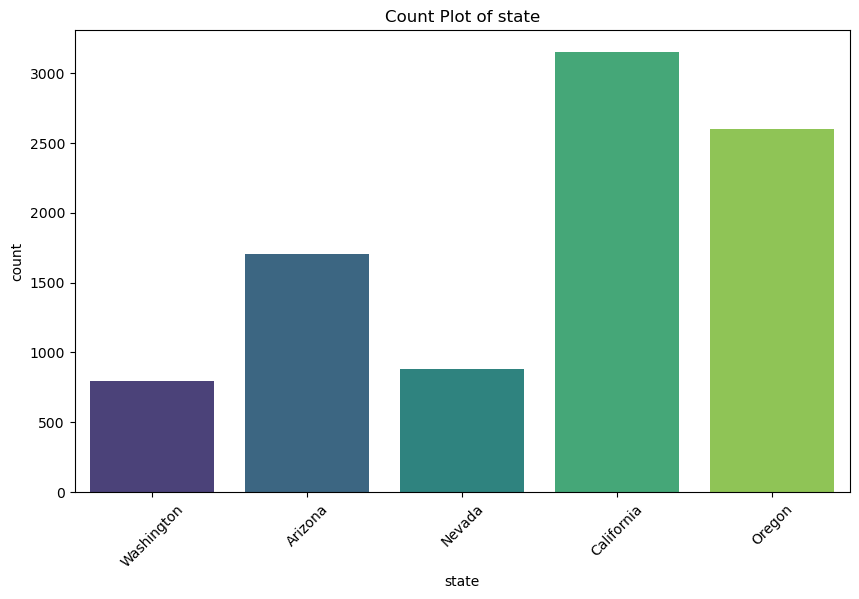

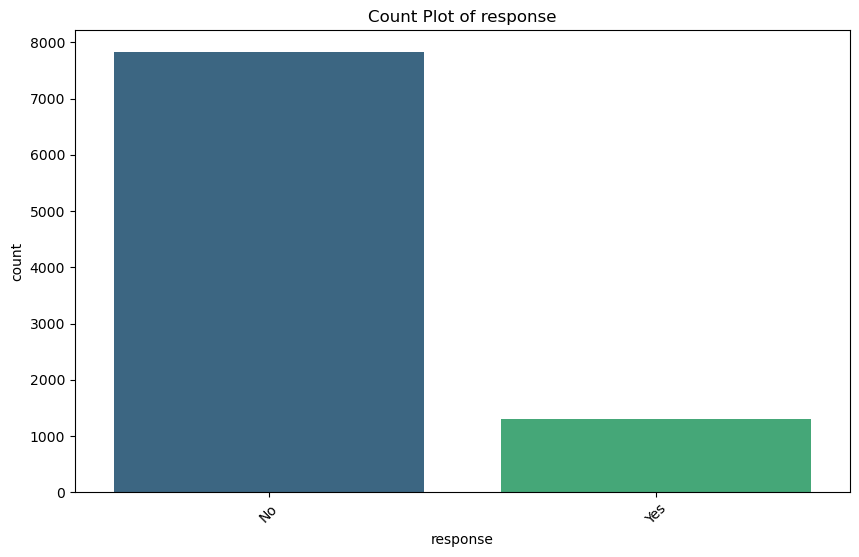

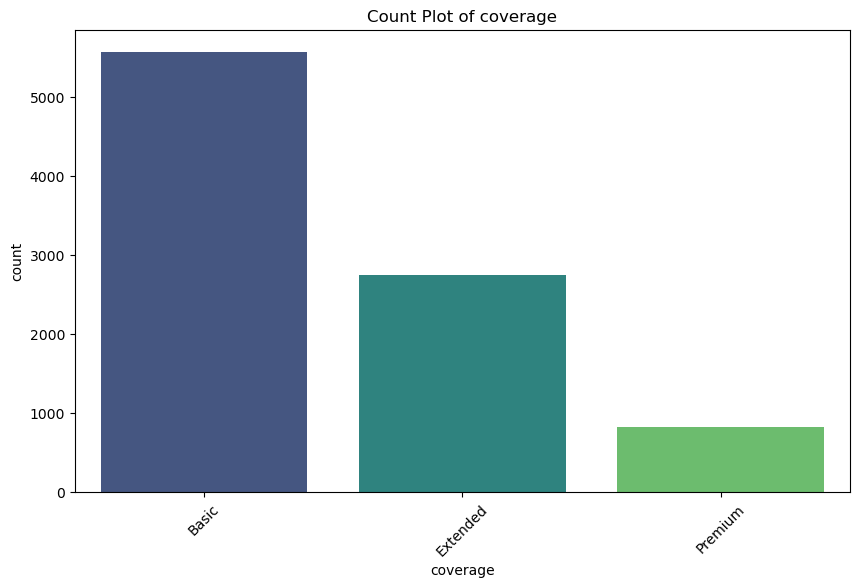

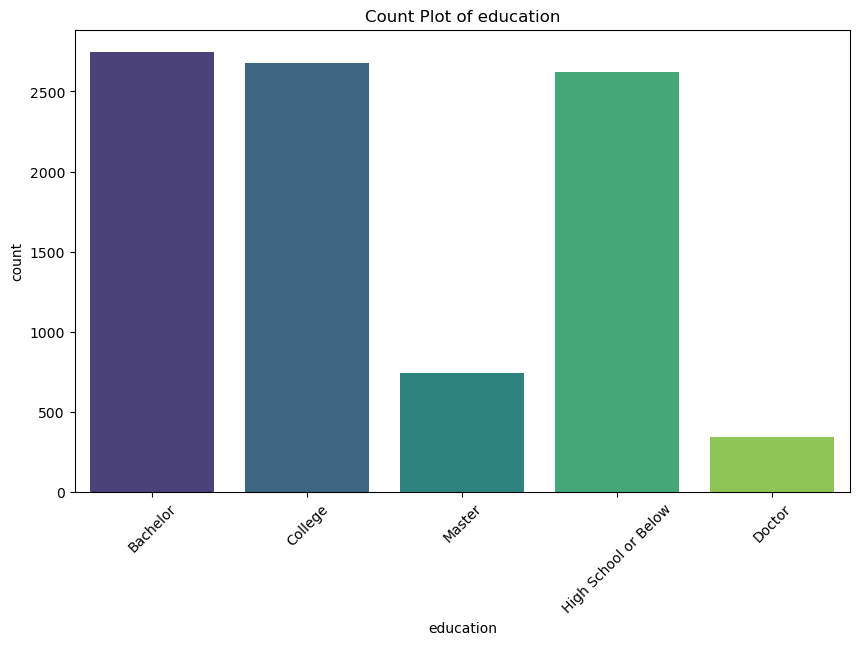

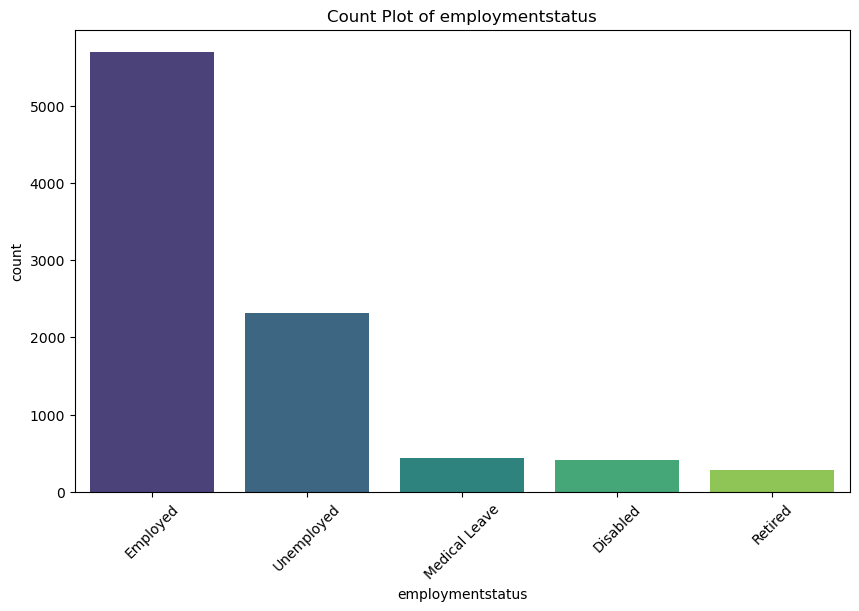

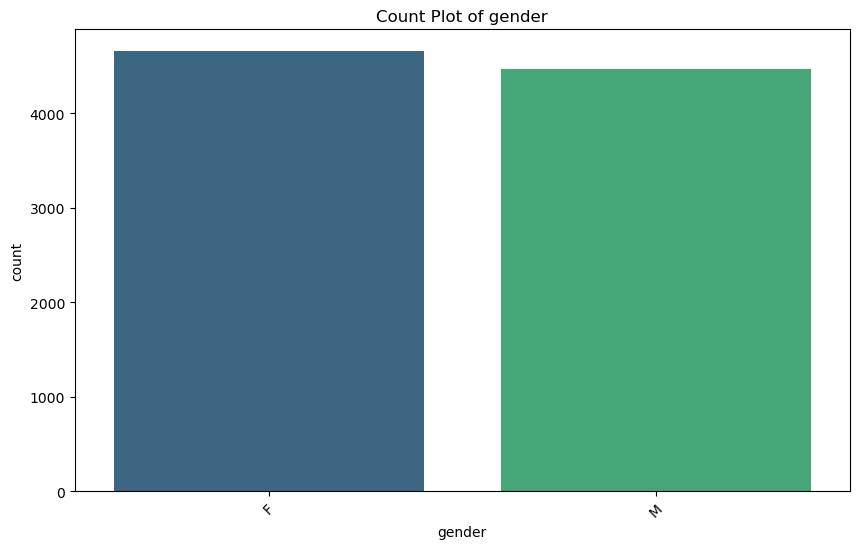

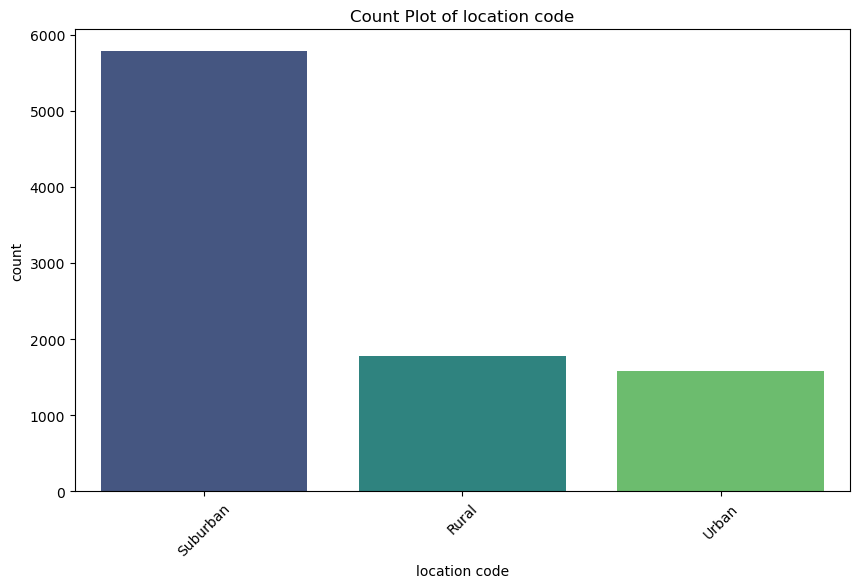

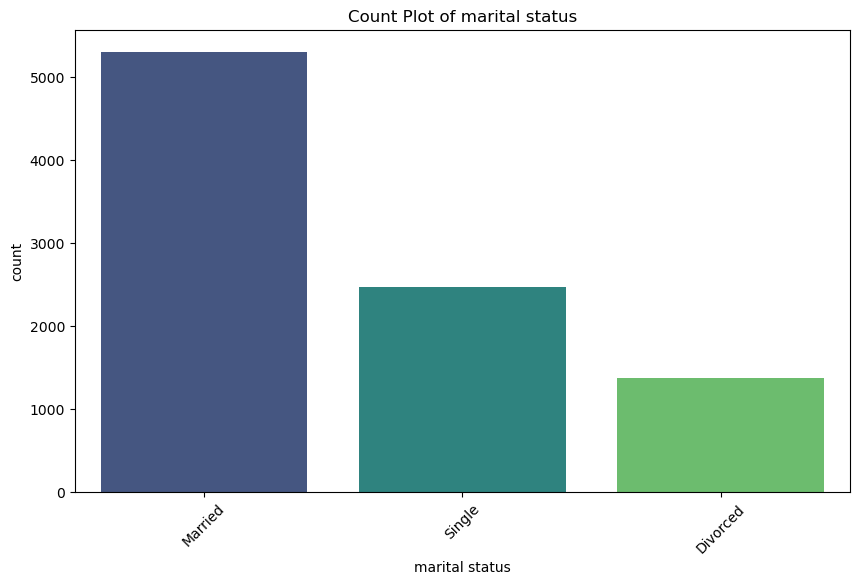

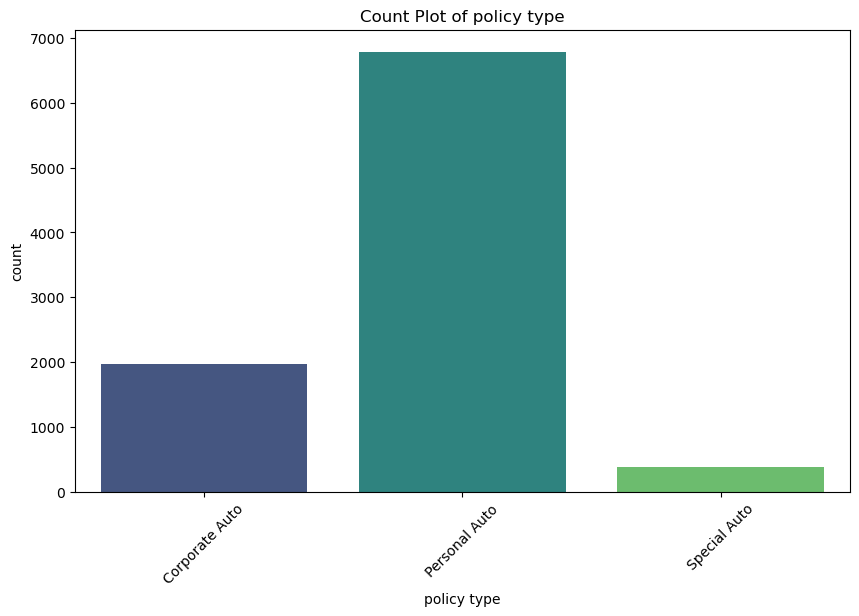

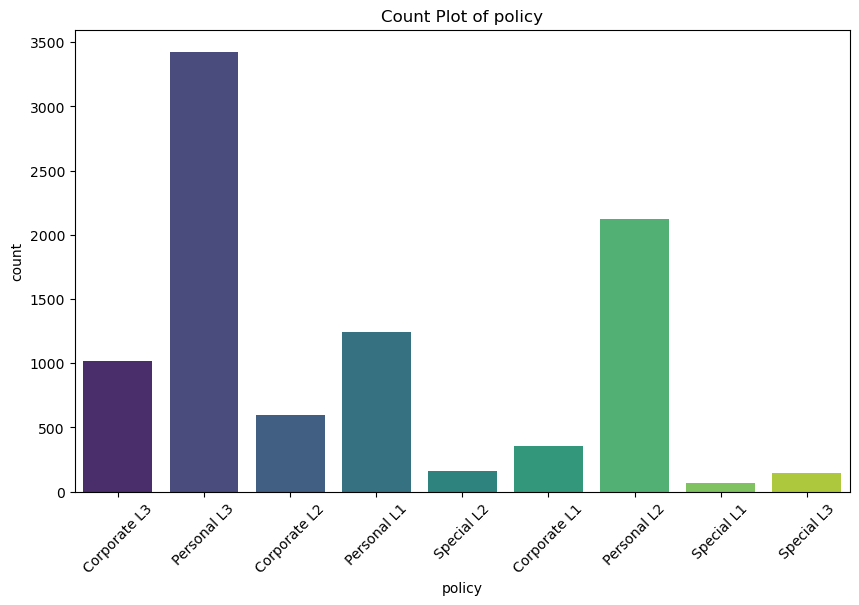

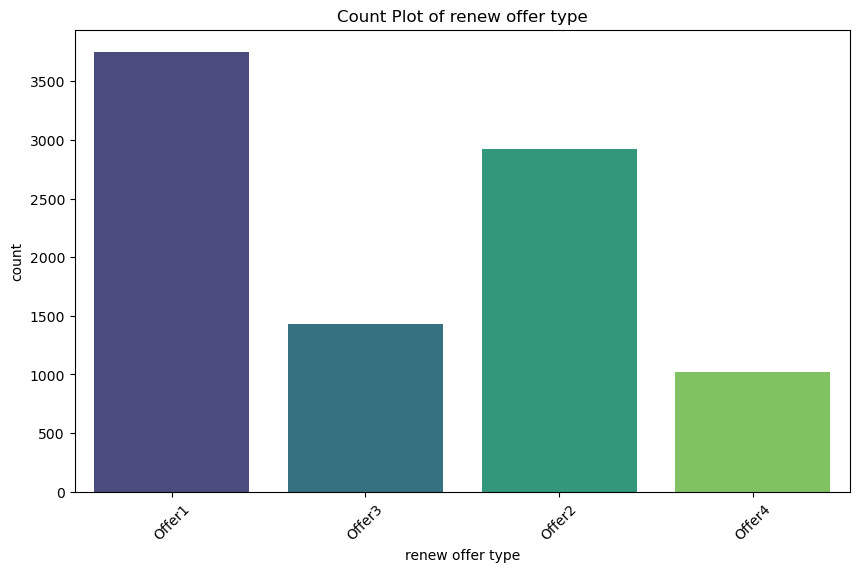

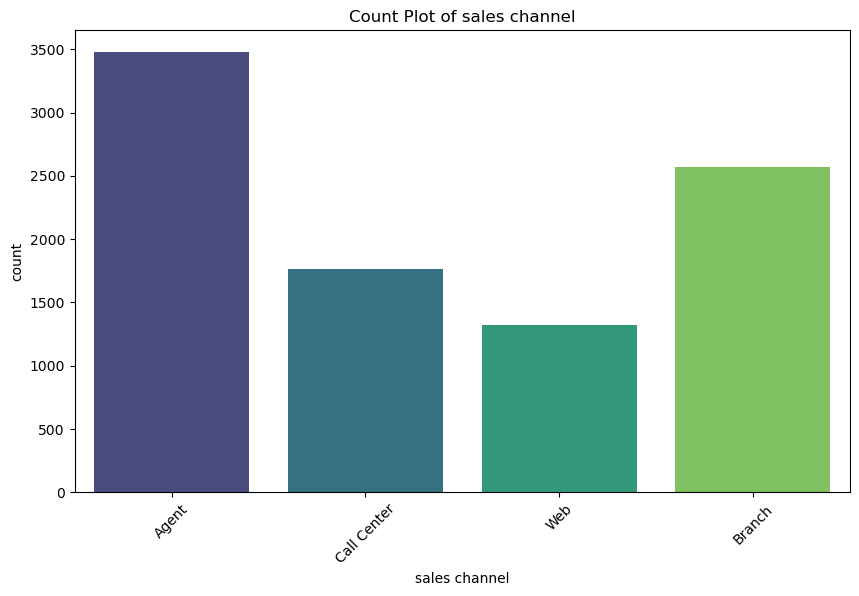

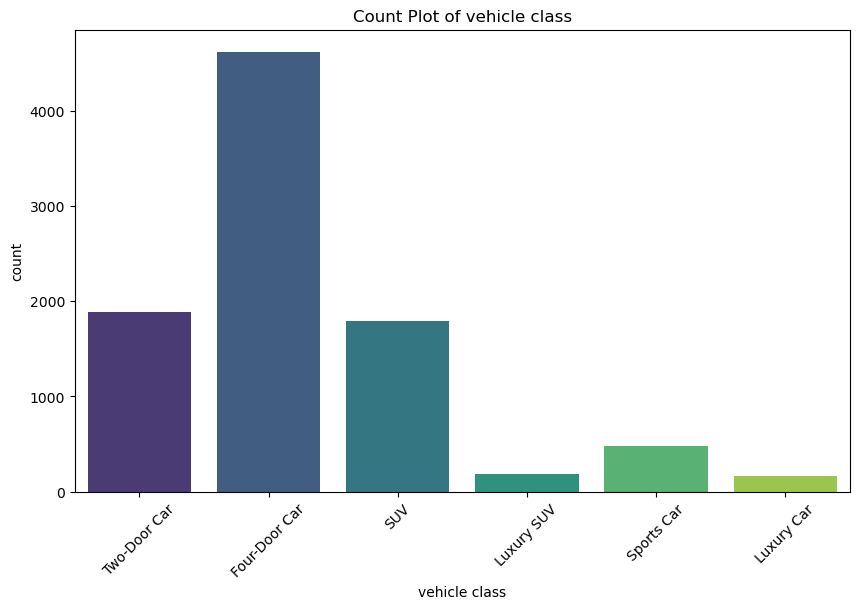

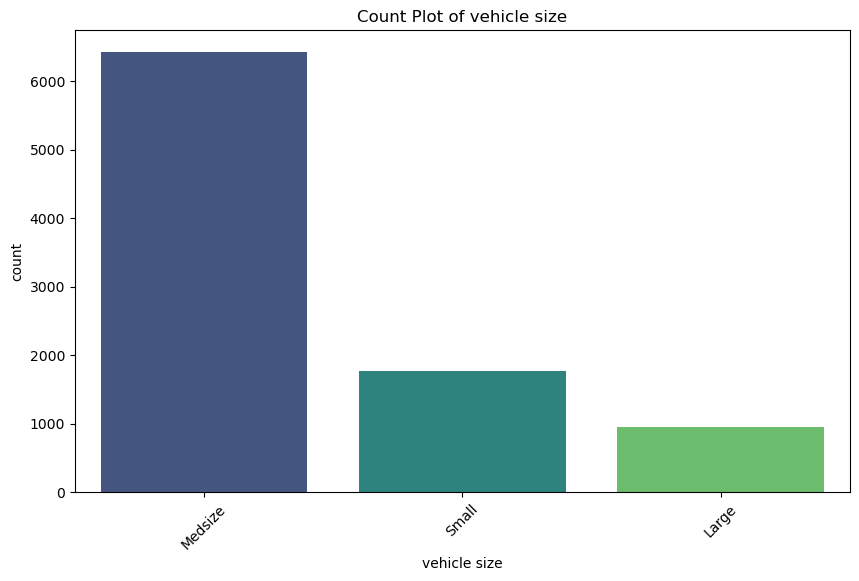

In [242]:
#Plotting the categorical variables
for col in customer_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=customer_df, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

From the categorical columns we can see:

Most of the clients are from California, followeb by a little margin by Oregon.

There are more non responded claims than responded by a great margin.

There's more basic coverages than any other.

Master and Doctor are the less ocurrent education levels, with the other three being fairly even in numbers.

Most of the clients are employed.

There are more females than males, but only by a little margin.

Most of the clients are located in suburban areas.

Most of the clients are married.

We have more personal auto policies than any other.

Personal, Corporate and Special L3 are the most used policy types for each sector.

Offer 1 is the one that most of the consumers select when renewing

The agents are the main source of sales, followed by the branches.

We have insured more Four Door Cars than anything else.

We have insured more medium size vehicles than anything else.

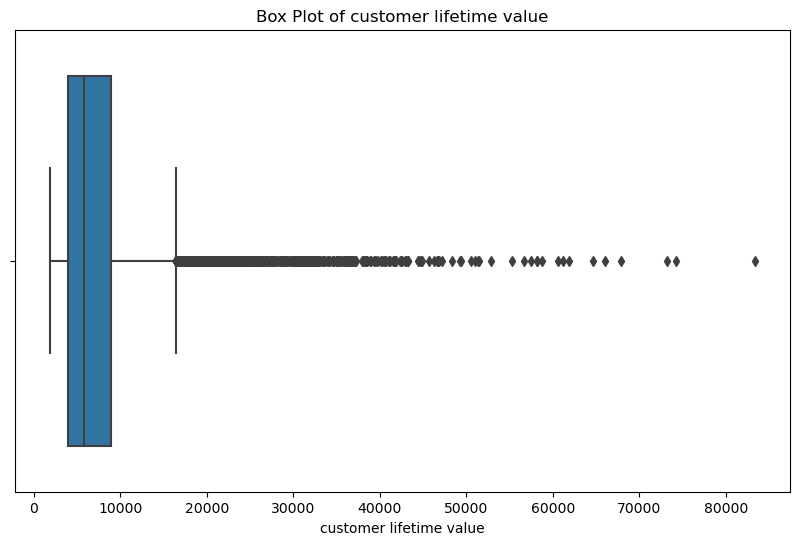

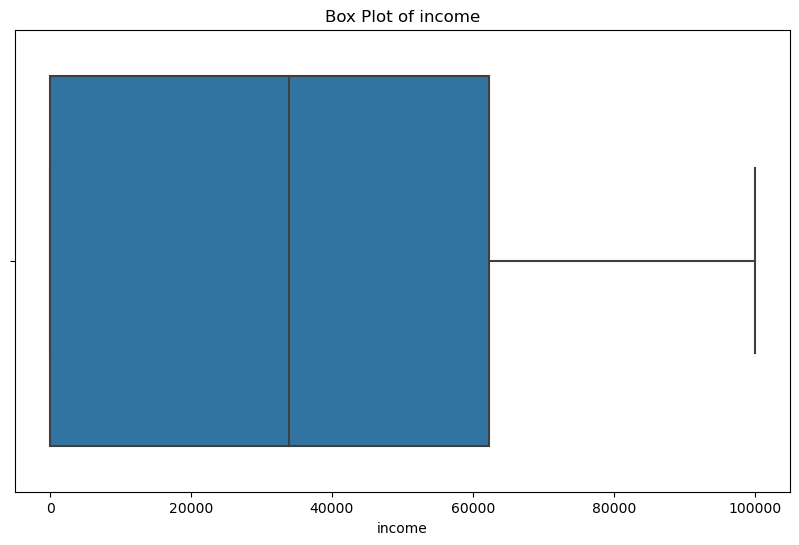

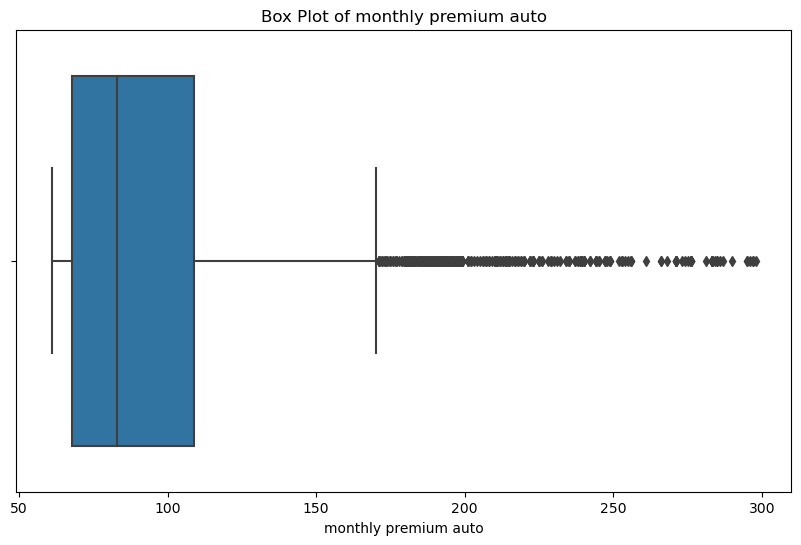

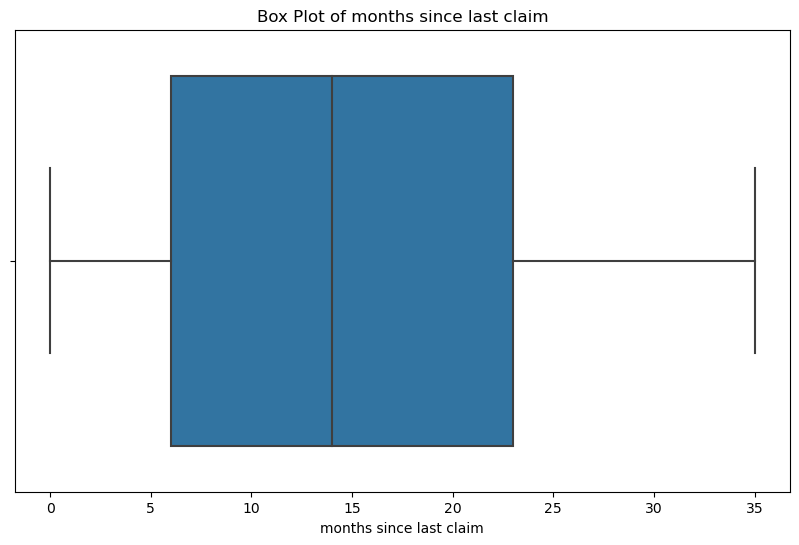

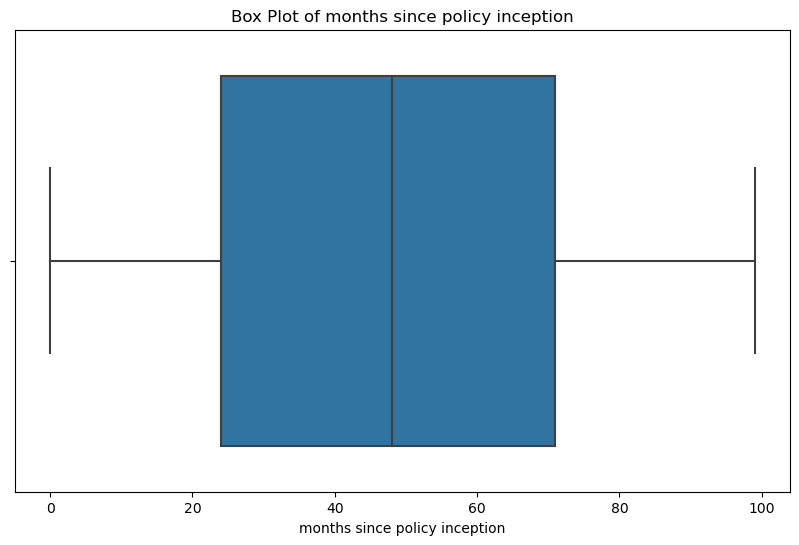

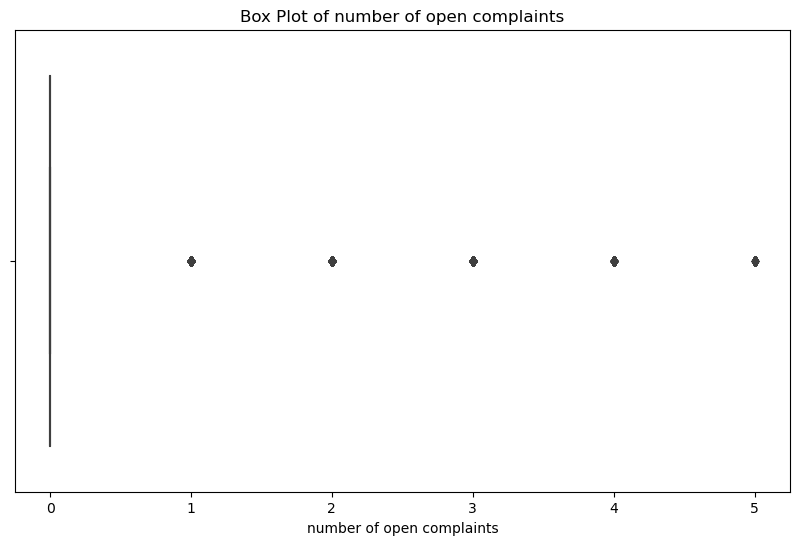

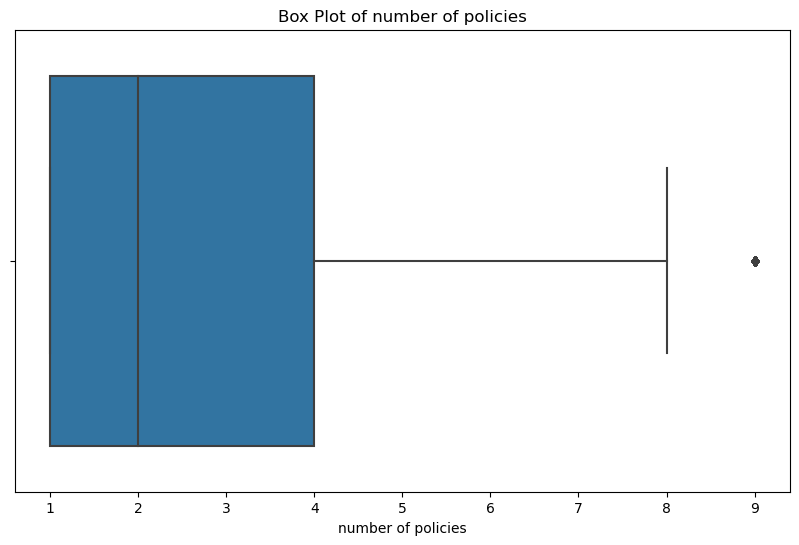

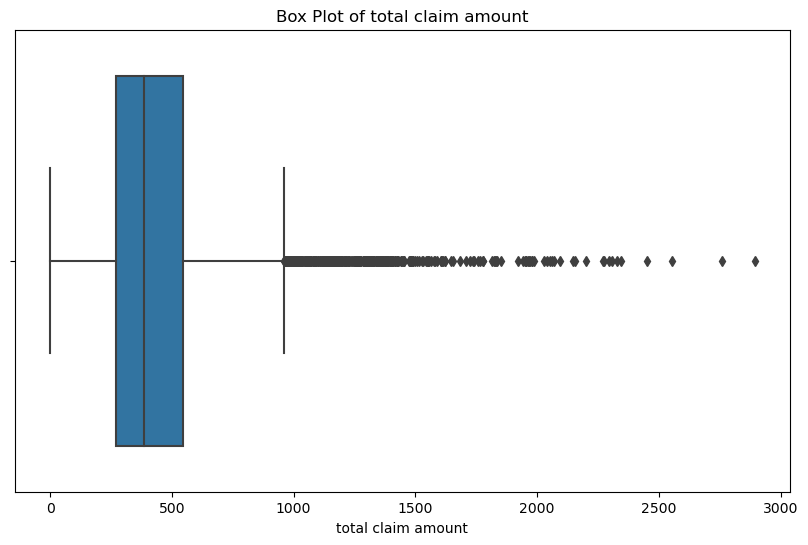

In [243]:
#Using a Boxplot to detect outliers
for column in numerical_df:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=numerical_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

From the boxplots we can get:

Customer Lifetime Value: There are a few outliers on the higher end, indicating that some customers have significantly higher values compared to the majority.

Income: There are a few outliers on the higher end, indicating some customers with high income.

Total Claim Amount: There are a few outliers on the higher end, suggesting that some customers have made large claim amounts compared to the majority.


In [244]:
#Checking all the columns for NaN values
for col in customer_df.columns:
    print(f'{col} has {customer_df[col].isna().sum()} NaN values')

state has 0 NaN values
customer lifetime value has 0 NaN values
response has 0 NaN values
coverage has 0 NaN values
education has 0 NaN values
effective to date has 0 NaN values
employmentstatus has 0 NaN values
gender has 0 NaN values
income has 0 NaN values
location code has 0 NaN values
marital status has 0 NaN values
monthly premium auto has 0 NaN values
months since last claim has 0 NaN values
months since policy inception has 0 NaN values
number of open complaints has 0 NaN values
number of policies has 0 NaN values
policy type has 0 NaN values
policy has 0 NaN values
renew offer type has 0 NaN values
sales channel has 0 NaN values
total claim amount has 0 NaN values
vehicle class has 0 NaN values
vehicle size has 0 NaN values


There are non NaN values, so it is not necessary to deal with them.

In [245]:
#Splitting the data intro categorical and numerical
categorical_df = customer_df.select_dtypes(include=['object'])
numerical_df = customer_df.select_dtypes(include=['int64', 'float64'])

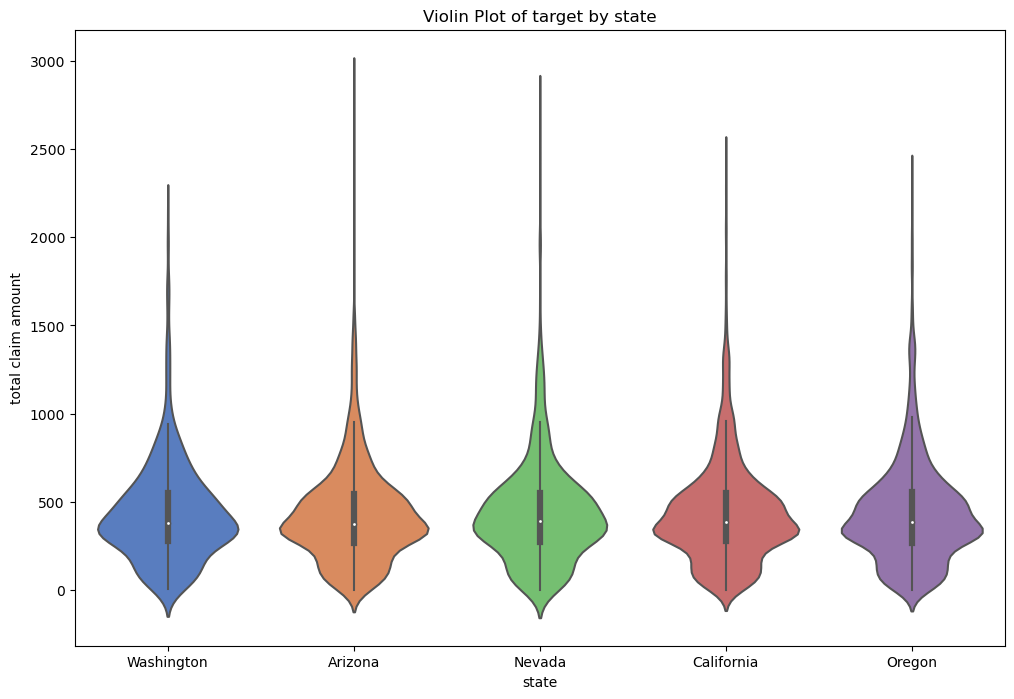

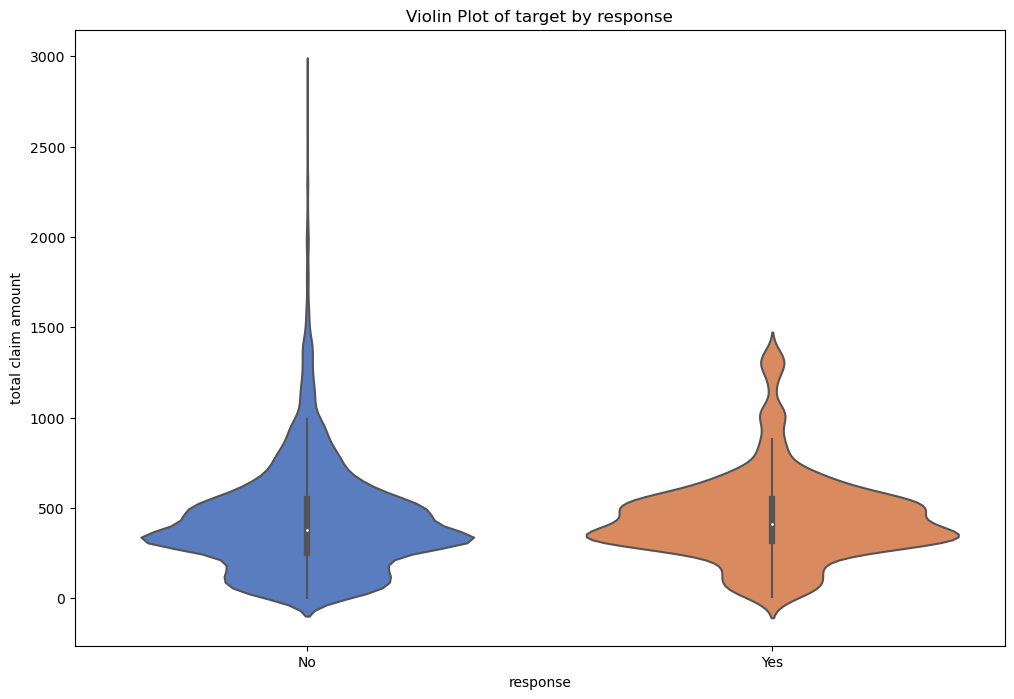

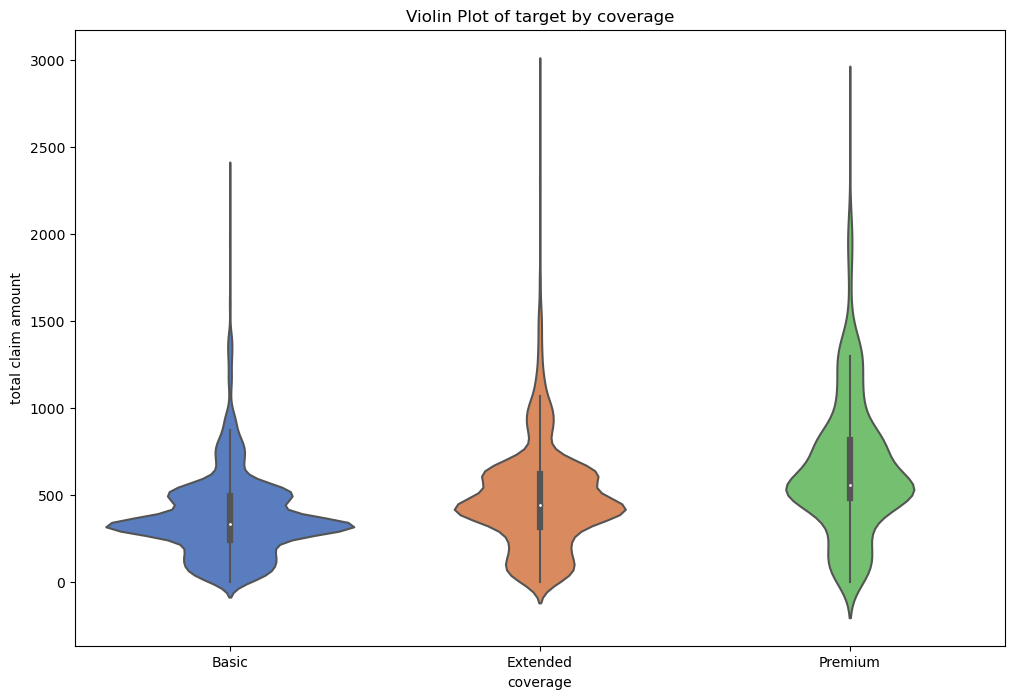

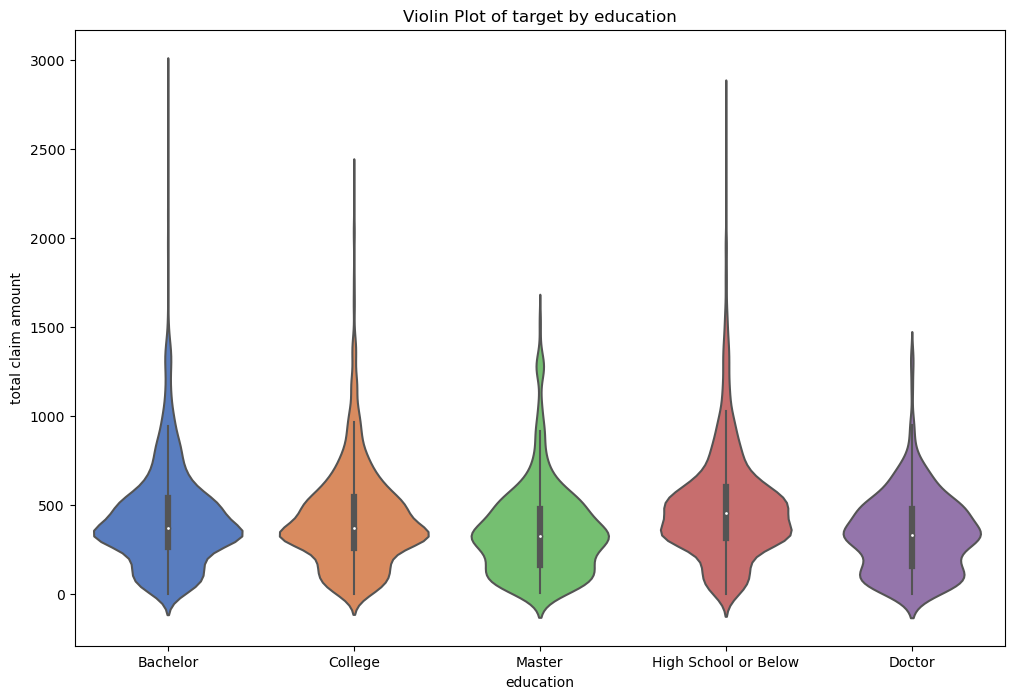

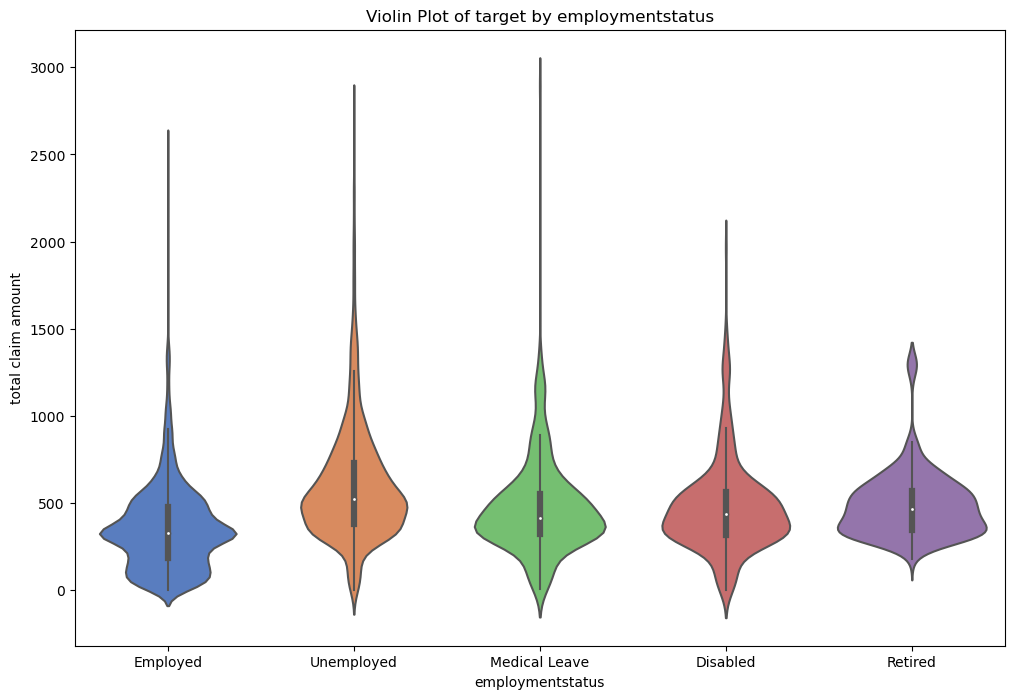

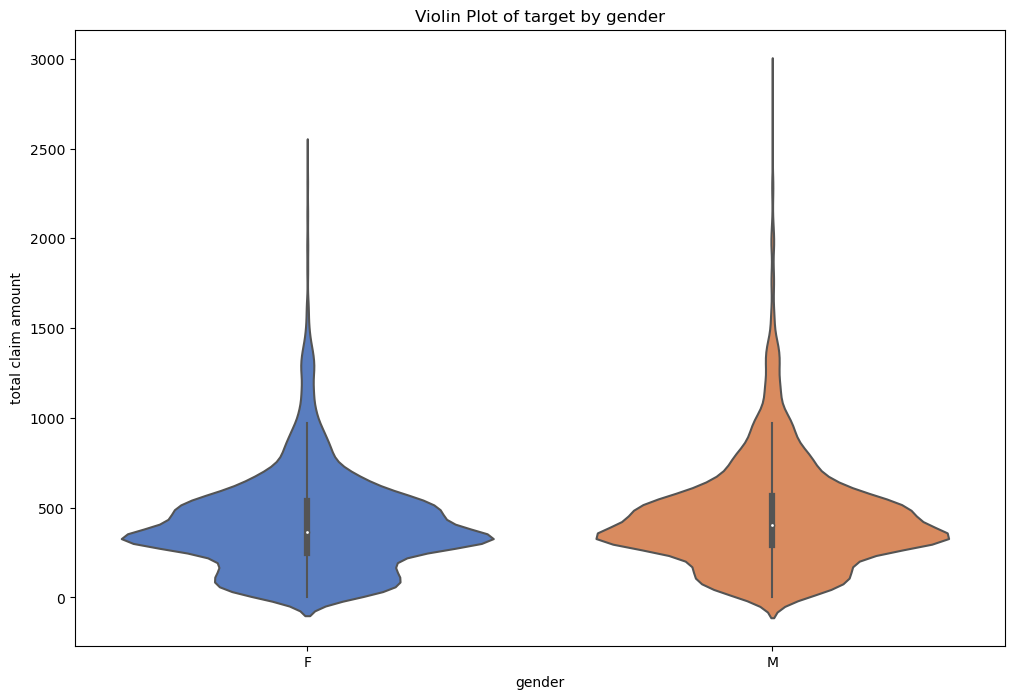

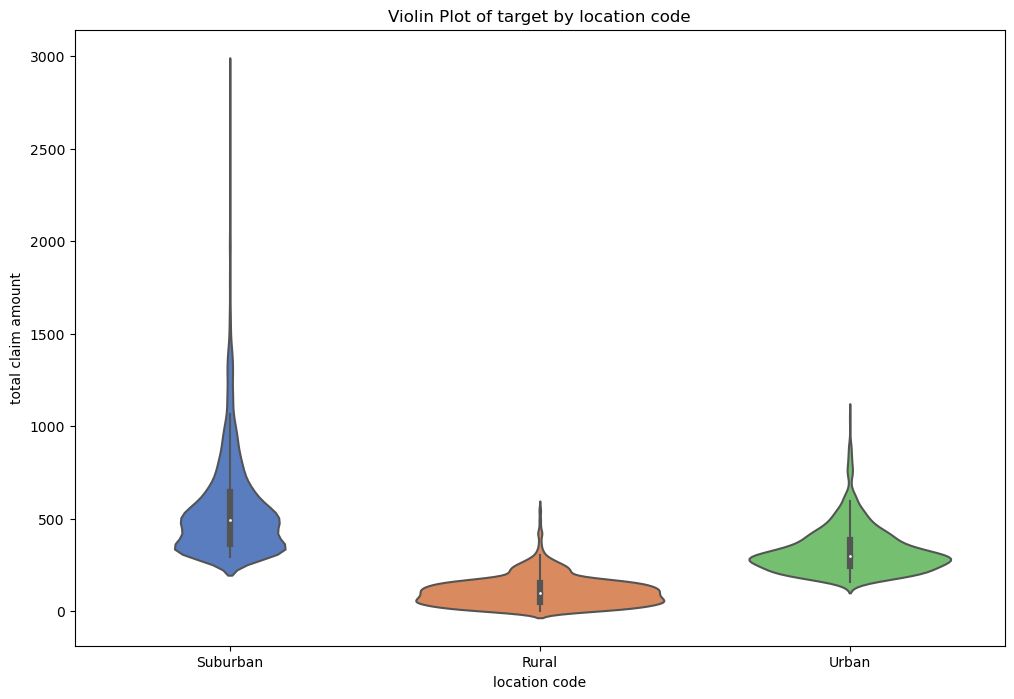

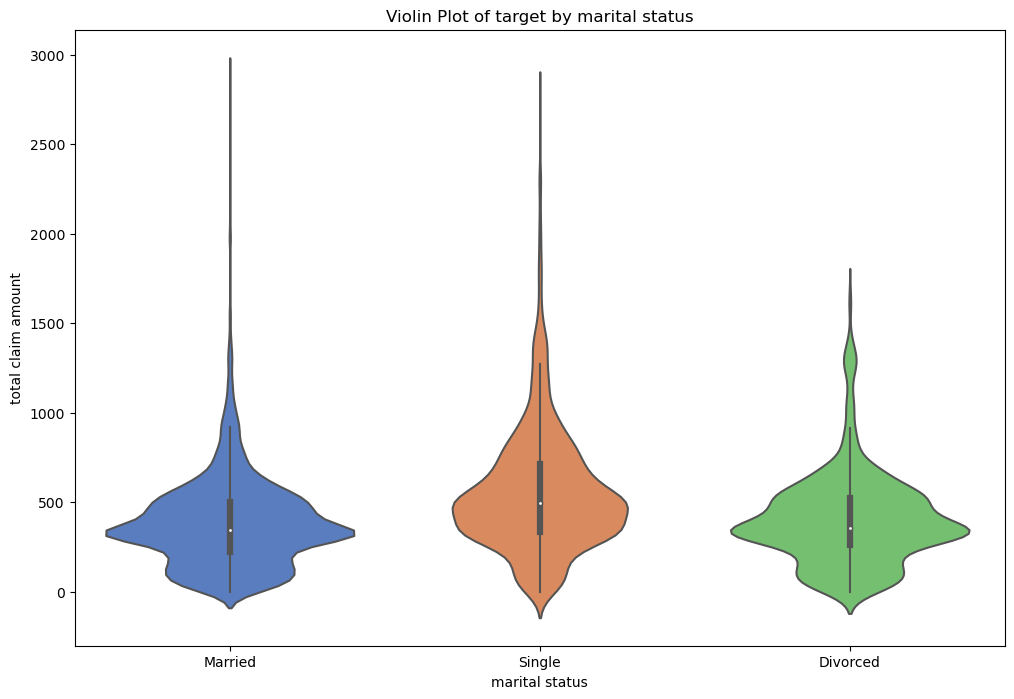

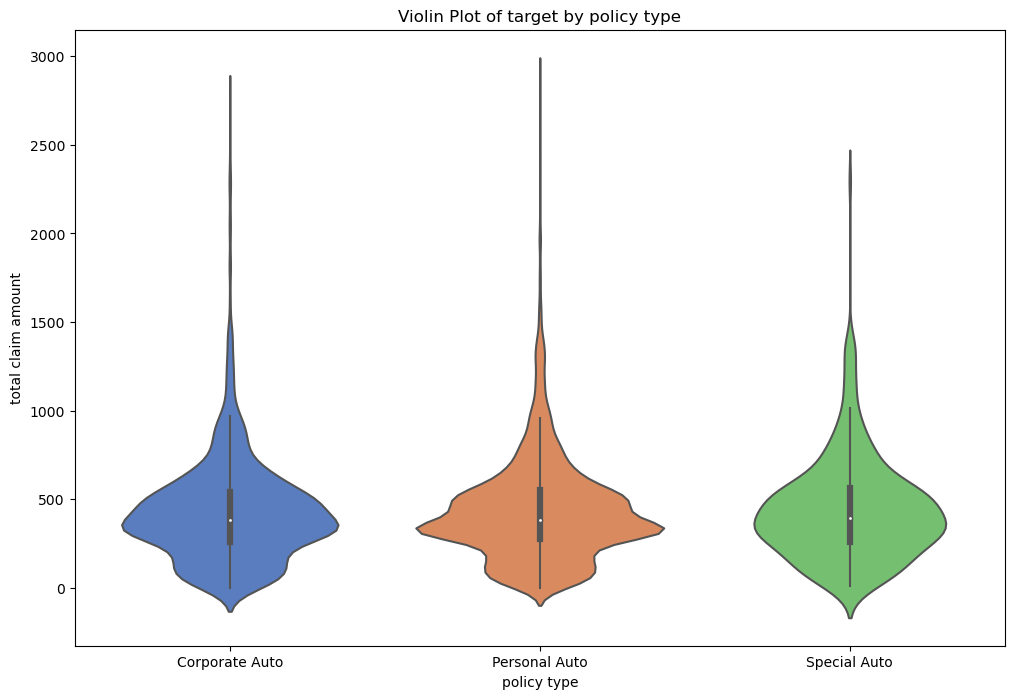

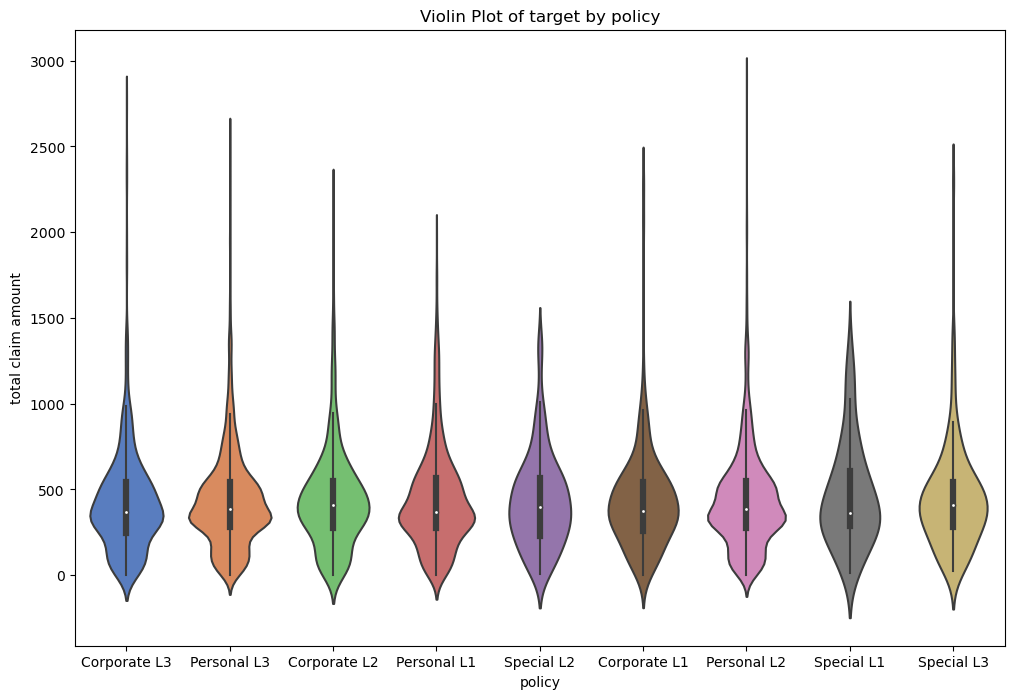

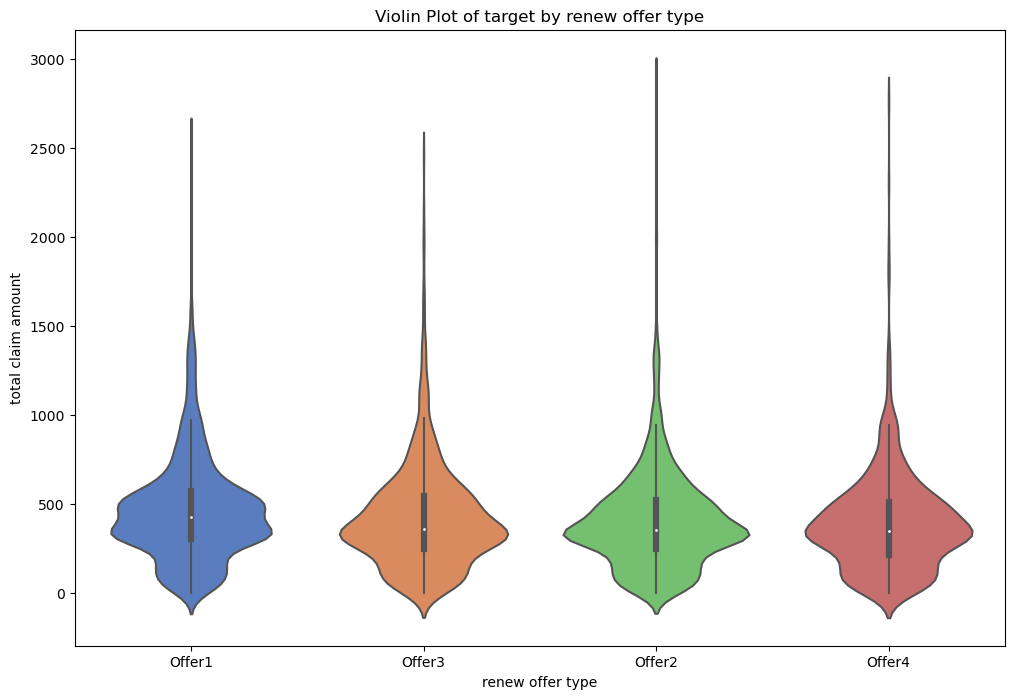

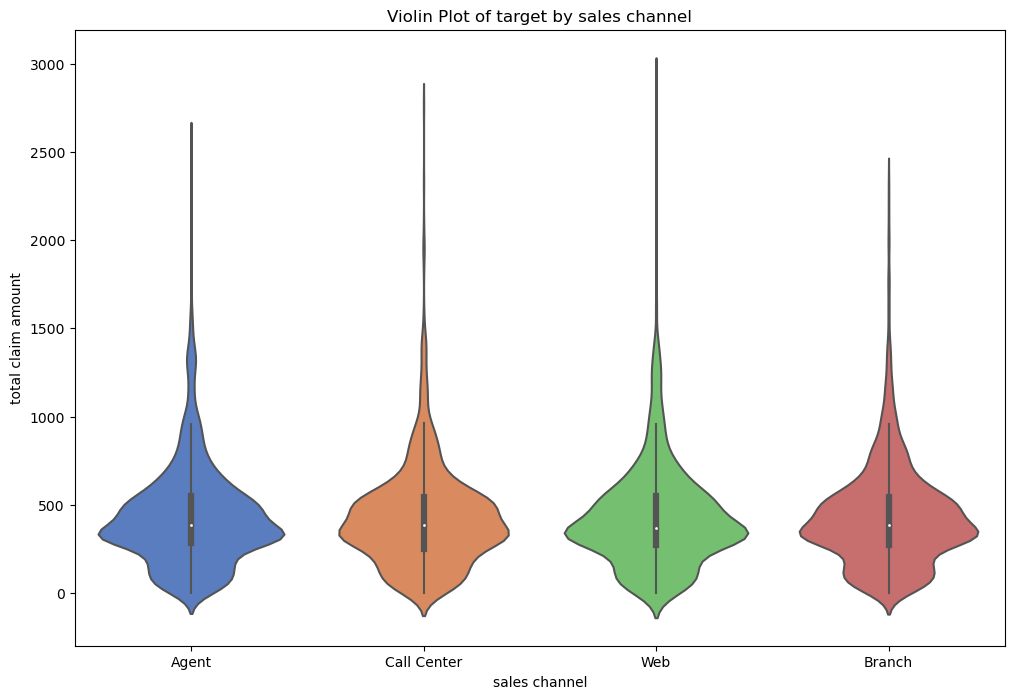

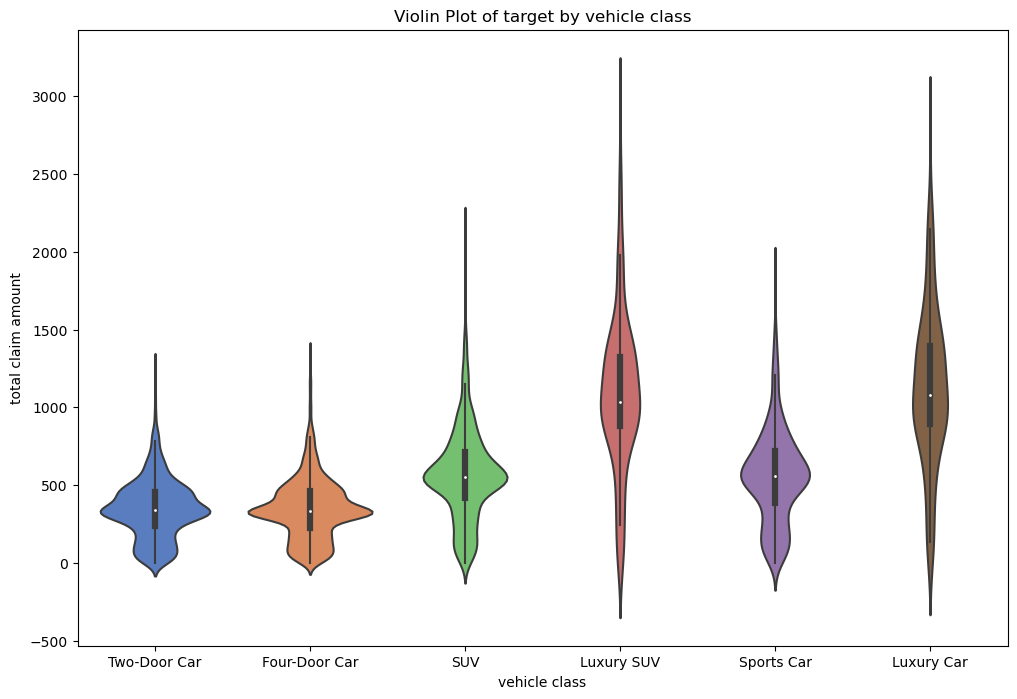

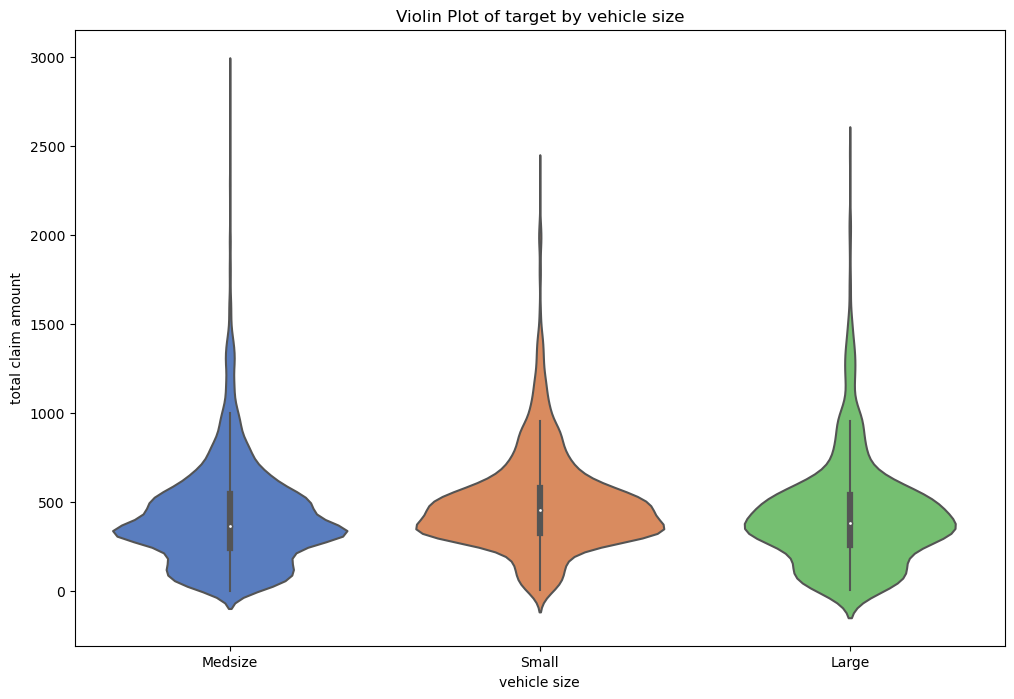

In [246]:
target = customer_df['total claim amount']
for col in categorical_df:
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=col, y=target, data=categorical_df, palette='muted', split=True)
    plt.title(f'Violin Plot of target by {col}')
    plt.show()

In [247]:
#Checking if there are data cleaning operations to be done on the categorical variables
for col in categorical_df.columns:
    print(f'{col} has {len(categorical_df[col].unique())} unique values')

#Checking the value counts of the categorical variables
for col in categorical_df.columns:
    print(f'{col} value counts:')
    print(categorical_df[col].value_counts())
    print()

state has 5 unique values
response has 2 unique values
coverage has 3 unique values
education has 5 unique values
employmentstatus has 5 unique values
gender has 2 unique values
location code has 3 unique values
marital status has 3 unique values
policy type has 3 unique values
policy has 9 unique values
renew offer type has 4 unique values
sales channel has 4 unique values
vehicle class has 6 unique values
vehicle size has 3 unique values
state value counts:
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response value counts:
response
No     7826
Yes    1308
Name: count, dtype: int64

coverage value counts:
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education value counts:
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employmen

I don¡t think that the categorical values need to be cleaned. Maybe the policy column could be unified by type, as in getting rid of Personal, Corporate and Special and merge them on their respective L1, L2 and L3, but I still think that having them separated can help us understand more things.

In [248]:
#Getting the head for the categorical variables
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [249]:
#Dropping the total claim amount target column
numerical_df.drop(['total claim amount'], axis=1, inplace=True)
numerical_df.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [250]:
#Now, we will do some feature selection for the numerical variables using VIF.
vif = add_constant(numerical_df)
threshold = 10

while True:
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

vif

,0
number of policies,1.001295
number of open complaints,1.001420
income,1.002301
months since policy inception,1.002441
months since last claim,1.002828
monthly premium auto,1.188198
customer lifetime value,1.190178


,const,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,1.0,2763.519279,56274,69,32,5,0,1
1,1.0,6979.535903,0,94,13,42,0,8
2,1.0,12887.431650,48767,108,18,38,0,2
3,1.0,7645.861827,0,106,18,65,0,7
4,1.0,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...
9129,1.0,23405.987980,71941,73,18,89,0,2
9130,1.0,3096.511217,21604,79,14,28,0,1
9131,1.0,8163.890428,0,85,9,37,3,2
9132,1.0,7524.442436,21941,96,34,3,0,3


From the results of the VIF, we can see that no feature is in need to be dropped, as none got a score of more than 10

In [251]:
#Encoding the categorical variables
#First, we will use get_dummies for the nominal variables
dummy_cols = ['gender', 'state', 'marital status', 'policy type', 'policy', 'renew offer type', 'sales channel', 'vehicle class']
categorical_df = pd.get_dummies(categorical_df, columns=dummy_cols)

In [252]:
categorical_df.head()

,response,coverage,education,employmentstatus,location code,vehicle size,gender_F,gender_M,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car
0,No,Basic,Bachelor,Employed,Suburban,Medsize,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
1,No,Extended,Bachelor,Unemployed,Suburban,Medsize,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False
2,No,Premium,Bachelor,Employed,Suburban,Medsize,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,No,Basic,Bachelor,Unemployed,Suburban,Medsize,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
4,No,Basic,Bachelor,Employed,Rural,Medsize,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False


In [253]:
#Now, we will encode the ordinal variables

categorical_df['coverage'] = categorical_df['coverage'].map({'Basic': 0, 'Extended': 1, 'Premium': 2})
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].map({'Unemployed': 0, 'Employed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4})
categorical_df['location code'] = categorical_df['location code'].map({'Suburban': 0, 'Rural': 1, 'Urban': 2})
categorical_df['vehicle size'] = categorical_df['vehicle size'].map({'Small': 0, 'Medsize': 1, 'Large': 2})
categorical_df['response'] = categorical_df['response'].map({'No': 0, 'Yes': 1})
categorical_df['education'] = categorical_df['education'].map({'High School or Below': 0, 'College': 1, 'Bachelor': 2, 'Master': 3, 'Doctor': 4})

In [254]:
#Checking the VIF of categorical variables
vif = add_constant(categorical_df.astype(float))
threshold = 10

while True:
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

vif

,0
coverage,1.010381e+00
vehicle size,1.018751e+00
education,1.032717e+00
location code,1.105167e+00
employmentstatus,1.146081e+00
response,1.176116e+00
sales channel_Branch,2.438411e+06
vehicle class_Four-Door Car,1.536225e+07
vehicle class_SUV,1.818746e+07
policy_Special L1,inf


,0
coverage,1.010276
gender_M,1.013285
vehicle size,1.018752
education,1.032640
location code,1.105135
employmentstatus,1.146081
response,1.176159
policy_Special L2,inf
policy_Special L3,inf
renew offer type_Offer1,inf


,0
coverage,1.010381
gender_M,1.013198
vehicle size,1.018695
education,1.032755
location code,1.105167
employmentstatus,1.146067
response,1.176120
state_Washington,1.344394
state_Nevada,1.375323
state_Oregon,1.812301


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018766
education,1.032460
location code,1.105167
employmentstatus,1.146083
response,1.176159
state_Washington,1.344394
state_Nevada,1.375323
state_Oregon,1.812301


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
education,1.032770
location code,1.105167
employmentstatus,1.146083
response,1.176159
state_Washington,1.344394
state_Nevada,1.375323
state_Oregon,1.812301


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
education,1.032770
location code,1.105167
employmentstatus,1.146083
response,1.176159
state_Washington,1.344394
state_Nevada,1.375323
state_Oregon,1.812301


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
education,1.032770
location code,1.105167
employmentstatus,1.146083
response,1.176159
state_Washington,1.344394
state_Nevada,1.375323
state_Oregon,1.812301


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
education,1.032770
location code,1.105167
employmentstatus,1.146083
response,1.176159
policy_Special L1,1.180365
state_Washington,1.344394
state_Nevada,1.375323


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
education,1.032770
location code,1.105167
employmentstatus,1.146083
response,1.176159
policy_Special L1,1.180365
renew offer type_Offer4,1.203153
renew offer type_Offer3,1.208838


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
education,1.032770
location code,1.105167
employmentstatus,1.146083
response,1.176159
policy_Special L1,1.180365
renew offer type_Offer4,1.203153
renew offer type_Offer3,1.208838


,0
coverage,1.010381
gender_M,1.013332
vehicle size,1.018768
vehicle class_Luxury Car,1.022410
vehicle class_Luxury SUV,1.024733
education,1.032770
vehicle class_Sports Car,1.052332
location code,1.105167
vehicle class_Two-Door Car,1.122264
vehicle class_SUV,1.131220


,const,response,coverage,education,employmentstatus,location code,vehicle size,gender_M,state_California,state_Nevada,state_Oregon,state_Washington,marital status_Married,marital status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car
0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From the VIF of the categoricals, even though some features got a score of 5 or 6, none got a 10 or more, so none are candidates to be dropped. During the test of the model, we could try to drop those columns to see if it gets better.

In [255]:
#Creating three new columns for the month, day and year of the effective to date column as integer values
customer_df['month'] = customer_df['effective to date'].dt.month
customer_df['day'] = customer_df['effective to date'].dt.day
customer_df['year'] = customer_df['effective to date'].dt.year

In [256]:
#Creating a dataframe to plot the month, day and year columns with the target
target = customer_df['total claim amount']
month = customer_df['month']
day = customer_df['day']
year = customer_df['year']
time_plot = pd.DataFrame({'month': month, 'day': day, 'year': year, 'target': target})


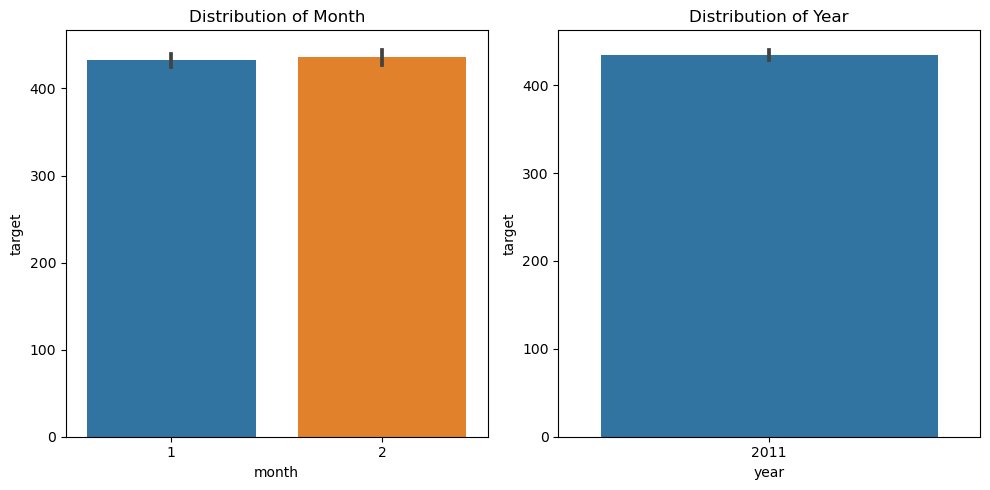

In [257]:
#Plotting month and year together as they have less values than day with the target
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=time_plot, x='month', y='target')
plt.title('Distribution of Month')

plt.subplot(1, 2, 2)
sns.barplot(data=time_plot, x='year', y='target')
plt.title('Distribution of Year')

plt.tight_layout()
plt.show()


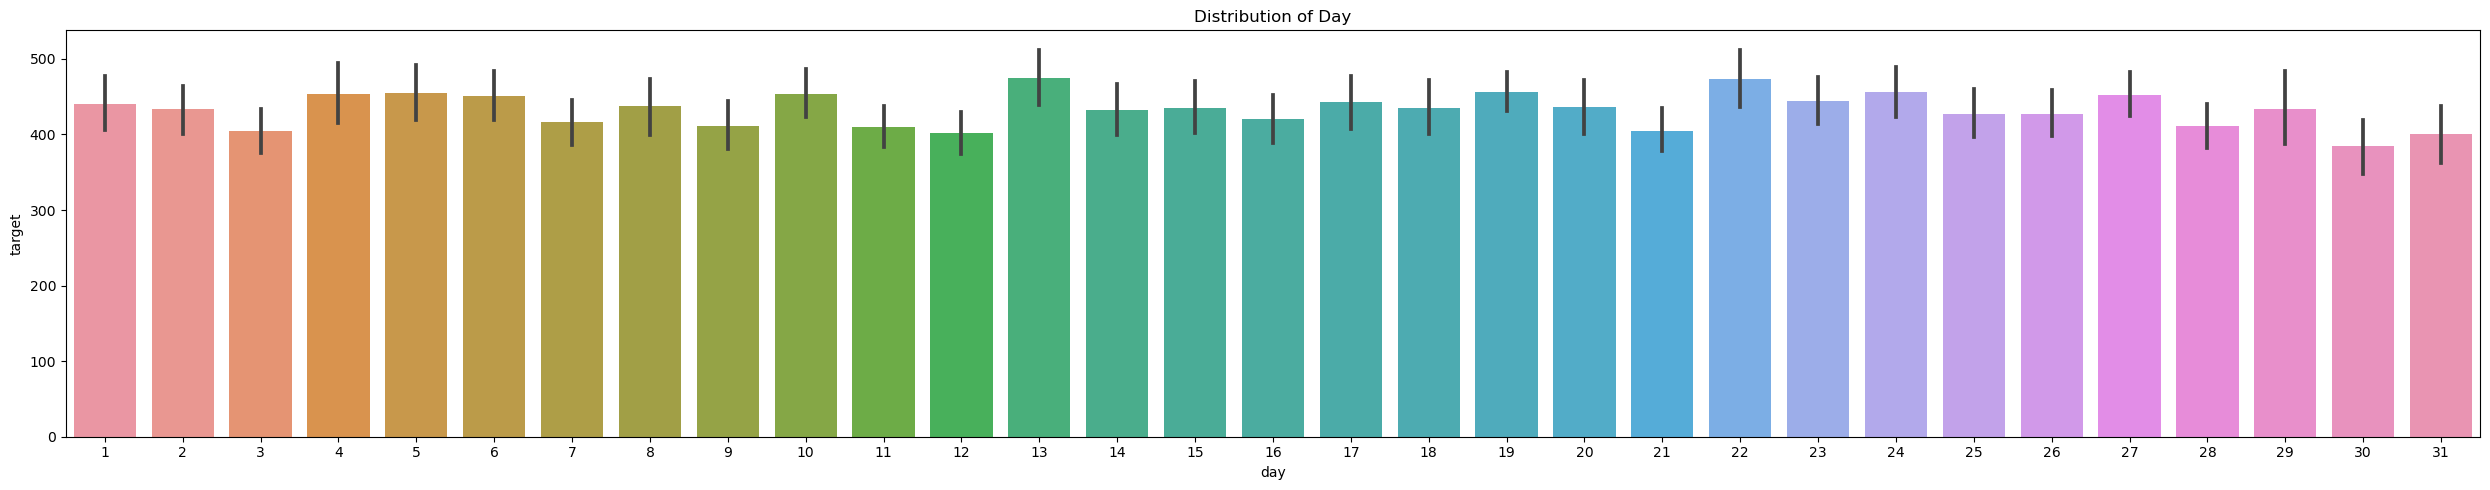

In [258]:
#Plotting day with target
plt.figure(figsize=(25, 5))

sns.barplot(data=time_plot, x='day', y='target')
plt.title('Distribution of Day')

plt.tight_layout()
plt.show()

From the time variables we can't extract much. Month and year have limited data and are not relevant. For day, it is dairly even, we see more data on specific days, mainly 4, 5, 6, 13, 19, 22 and 24, but it is not something relevant.

In [259]:
#Adding the splitted day, month and year columns to the numerical dataframe
numerical_df['month'] = customer_df['month']
numerical_df['day'] = customer_df['day']
numerical_df['year'] = customer_df['year']

In [260]:
#Dealing with outliers in the income column
iqr = np.percentile(numerical_df['income'],75) - np.percentile(numerical_df['income'],25)
upper_limit = np.percentile(numerical_df['income'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['income'],25) - 1.5*iqr
numerical_df = numerical_df[(numerical_df['income']>lower_limit) & (numerical_df['income']<upper_limit)]

In [261]:
#Dealing with the outliers in the customer lifetime value column
iqr = np.percentile(numerical_df['customer lifetime value'],75) - np.percentile(numerical_df['customer lifetime value'],25)
upper_limit = np.percentile(numerical_df['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['customer lifetime value'],25) - 1.5*iqr
numerical_df = numerical_df[(numerical_df['customer lifetime value']>lower_limit) & (numerical_df['customer lifetime value']<upper_limit)]

In [262]:
#Dealing with the outliers in the monthl premium auto column
iqr = np.percentile(numerical_df['monthly premium auto'],75) - np.percentile(numerical_df['monthly premium auto'],25)
upper_limit = np.percentile(numerical_df['monthly premium auto'],75) + 1.5*iqr
lower_limit = np.percentile(numerical_df['monthly premium auto'],25) - 1.5*iqr
numerical_df = numerical_df[(numerical_df['monthly premium auto']>lower_limit) & (numerical_df['monthly premium auto']<upper_limit)]


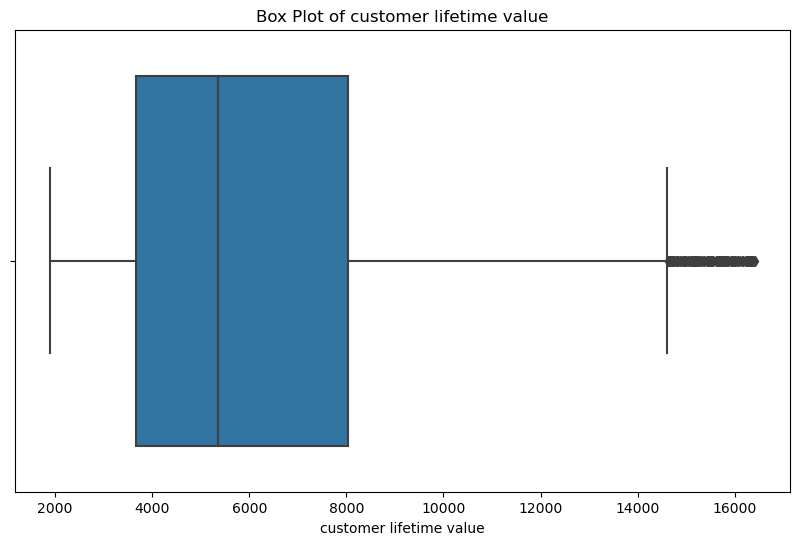

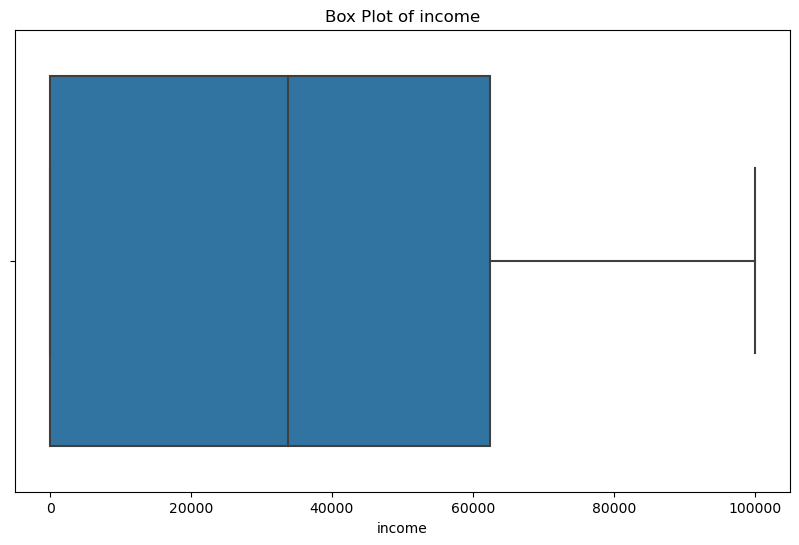

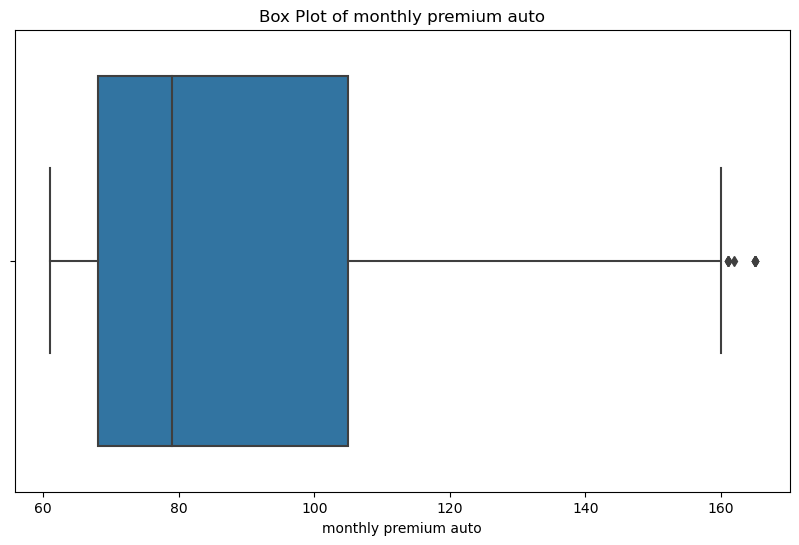

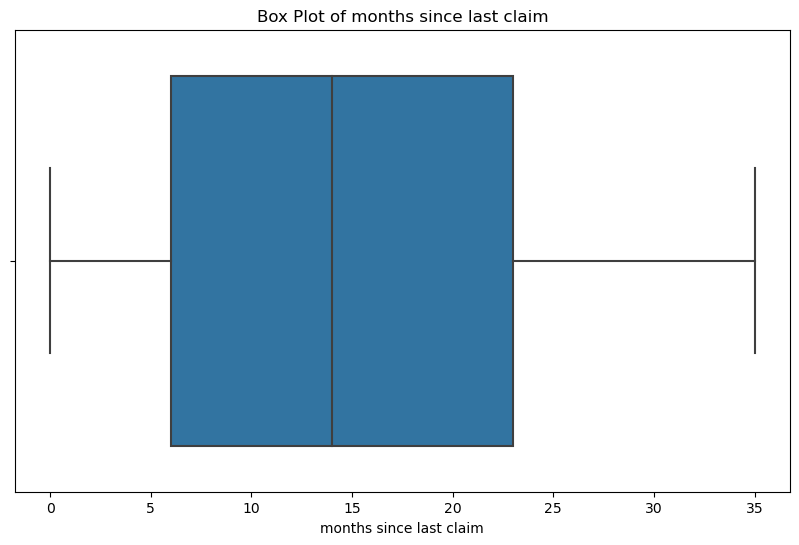

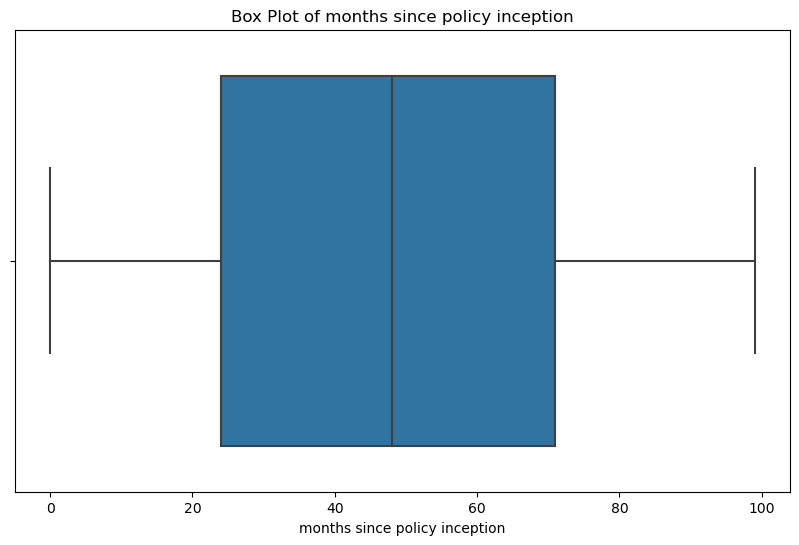

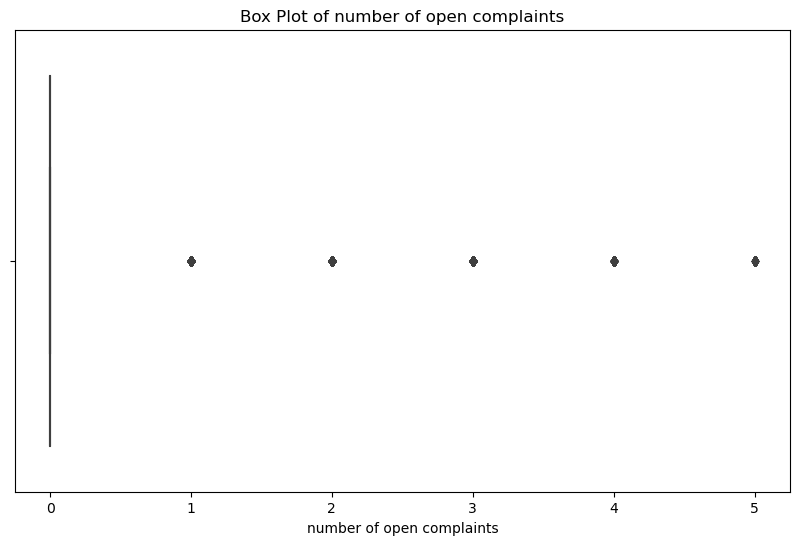

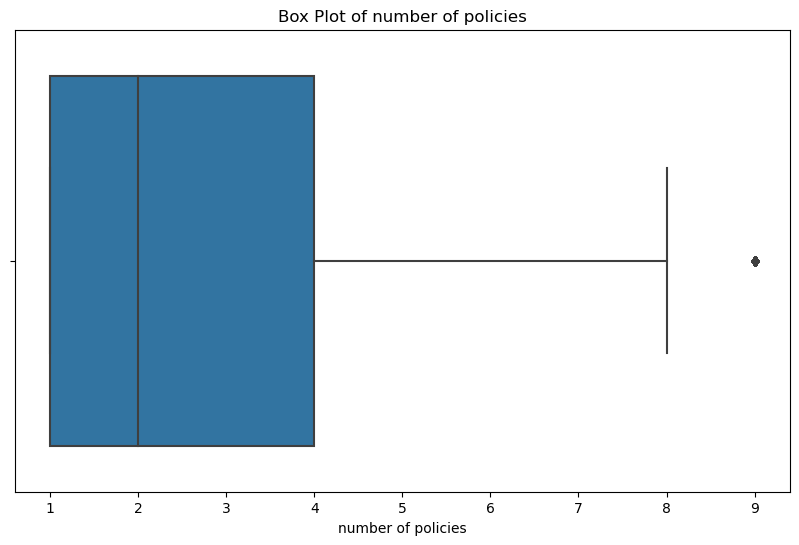

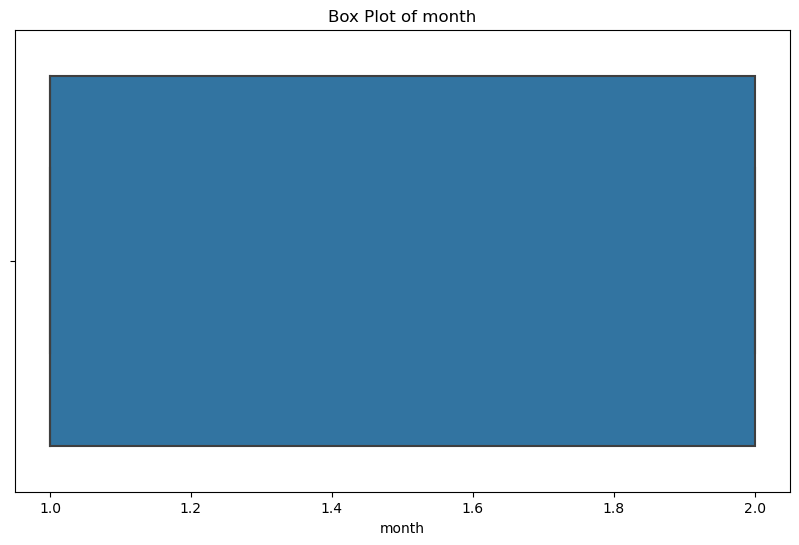

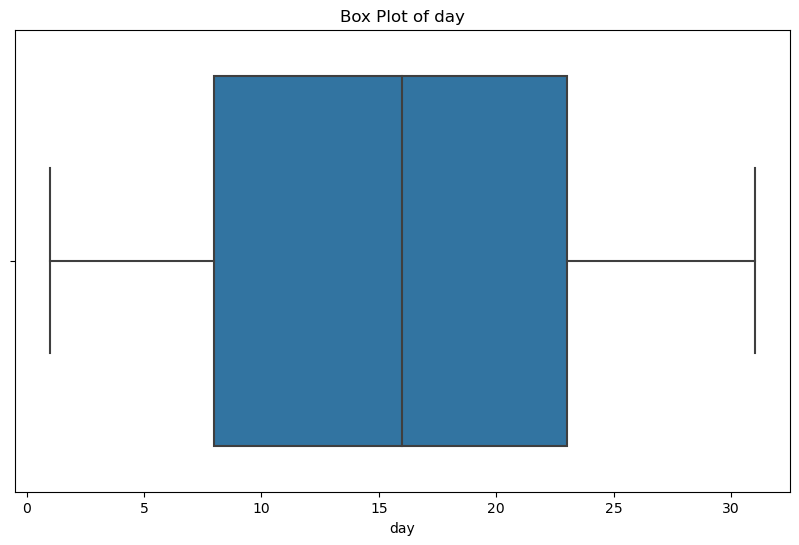

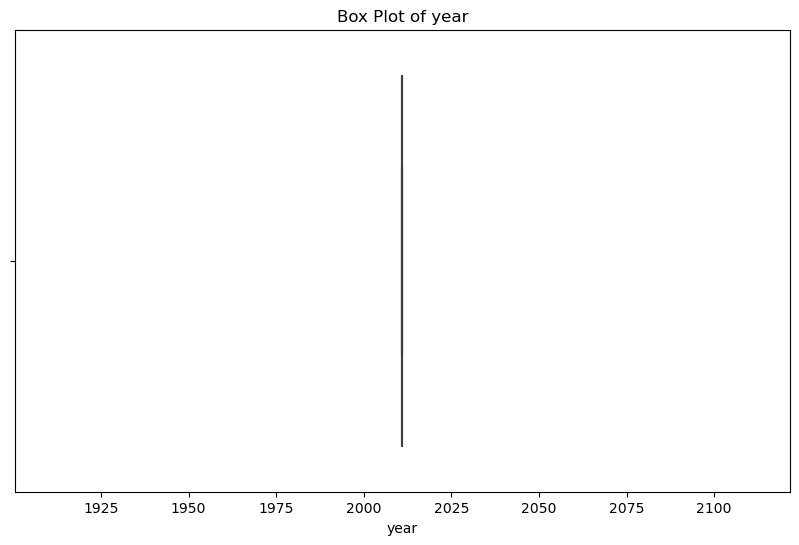

In [263]:
#Checking outliers after dealing with them
for column in numerical_df:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=numerical_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [266]:
#Using standard scaler to scale the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical_df = scaler.fit_transform(numerical_df)
scaled_numerical_df = pd.DataFrame(scaled_numerical_df, columns=numerical_df.columns)
scaled_numerical_df.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,day,year
0,-1.074283,0.610208,-0.797154,1.694436,-1.538264,-0.422483,-0.829739,1.074365,0.982303,0.0
1,0.275372,-1.236759,0.319758,-0.201906,-0.213892,-0.422483,2.007280,-0.930783,1.790950,0.0
2,2.166640,0.363821,0.945228,0.297131,-0.357068,-0.422483,-0.424451,1.074365,0.404698,0.0
3,0.488680,-1.236759,0.855875,0.297131,0.609366,-0.422483,1.601991,-0.930783,0.520219,0.0
4,-1.058221,0.201981,-0.618448,-0.301713,-0.142305,-0.422483,-0.829739,1.074365,-1.443638,0.0


In [269]:
#Merging the scaled numerical dataframe with the categorical dataframe
final_customer_df = pd.concat([scaled_numerical_df, categorical_df], axis=1)
final_customer_df.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,day,year,response,coverage,education,employmentstatus,location code,vehicle size,gender_F,gender_M,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car
0,-1.074283,0.610208,-0.797154,1.694436,-1.538264,-0.422483,-0.829739,1.074365,0.982303,0.0,0,0,2,1,0,1,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
1,0.275372,-1.236759,0.319758,-0.201906,-0.213892,-0.422483,2.007280,-0.930783,1.790950,0.0,0,1,2,0,0,1,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False
2,2.166640,0.363821,0.945228,0.297131,-0.357068,-0.422483,-0.424451,1.074365,0.404698,0.0,0,2,2,1,0,1,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,0.488680,-1.236759,0.855875,0.297131,0.609366,-0.422483,1.601991,-0.930783,0.520219,0.0,0,0,2,0,0,1,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
4,-1.058221,0.201981,-0.618448,-0.301713,-0.142305,-0.422483,-0.829739,1.074365,-1.443638,0.0,0,0,2,1,1,1,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
